Analysis of Preliminary Trail Data Pulled from Cavendish Balance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from scipy.signal import argrelextrema as argex
plt.style.use('ggplot')

In [2]:
data_dir = '../data/'
trial_data = np.loadtxt(data_dir+'20171025_cavendish_new_wire_free_decay.txt', delimiter='\t')

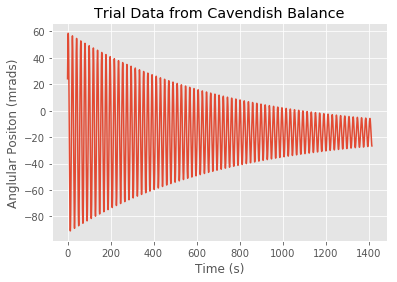

In [3]:
plt.plot(trial_data[:,0], trial_data[:,1])
plt.title("Trial Data from Cavendish Balance")
plt.ylabel("Anglular Positon (mrads)")
plt.xlabel("Time (s)")

The weird behavior at the beginning occured when we were making an alteration to the experimental setup itself (doing one of our many adjustments to try and zero out our $\theta_e$. We can ignore this as it is not indicative of our data and look at where it moves into a damped harmonic oscialltion.

In [4]:
x_data = trial_data[:,0]
y_data = trial_data[:,1]

Trying out the `scipy.optimzie` library to fit this to a decaying sinuisodal curve.

In [6]:
from scipy.optimize import curve_fit

In [7]:
def decay(t, a, b, w, phi, theta_0):
    return a*np.exp(-b*t)*np.cos(w*t + phi) + theta_0

In [8]:
popt, pcov = curve_fit(decay, x_data, y_data , p0 = (50, 1.3e-3, 3e-2, -6e-1, 0))

In [9]:
popt

array([  7.62496097e+01,   1.41007983e-03,   3.22579113e-01,
        -1.02008421e+00,  -1.64742121e+01])

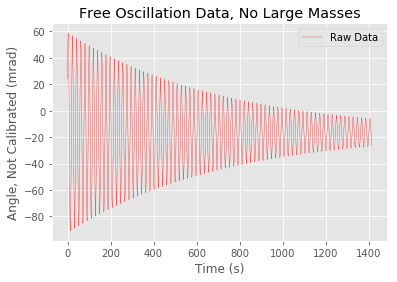

In [21]:
plt.plot(x_data, y_data, 'r-', linewidth = 0.3, label = "Raw Data")
# plt.plot(x_data, decay(x_data, *popt), 'g-', label = 'Fit of a*np.exp(-b*t)*np.cos(w*t + phi) + theta_0')
plt.title("Free Oscillation Data, No Large Masses")
plt.ylabel("Angle, Not Calibrated (mrad)")
plt.xlabel("Time (s)")
plt.legend()

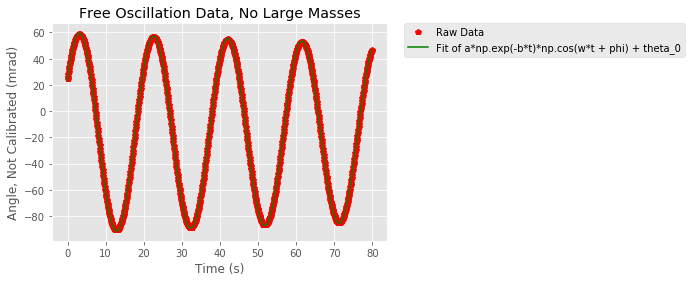

In [26]:
plt.plot(x_data[:800], y_data[:800], 'rp', linewidth = 5, label = "Raw Data")
plt.plot(x_data[:800], decay(x_data[:800], *popt), 'g-', label = 'Fit of a*np.exp(-b*t)*np.cos(w*t + phi) + theta_0')
plt.title("Free Oscillation Data, No Large Masses")
plt.ylabel("Angle, Not Calibrated (mrad)")
plt.xlabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
round(popt[1],5)

0.00141

$$b = 1.41 \times 10 ^{-3} \frac{1}{s}$$

In [27]:
np.pi*1.57E11*(0.08E-3)**4/(32*52.4E-3)

1.204836755086651e-05

In [28]:
np.pi*1.57E11*(25E-6)**4/(32*80E-3)

7.52609324056393e-08